In [65]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [67]:
path="/gdrive/My Drive/ML:March2020/data/"

In [68]:
data=pd.read_csv(path+"Mall_Customers.csv")
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5
0,1,Male,19,15,39,39
1,2,Male,21,15,81,81
2,3,Female,20,16,6,6
3,4,Female,23,16,77,77
4,5,Female,31,17,40,40
5,6,Female,22,17,76,76
6,7,Female,35,18,6,6
7,8,Female,23,18,94,94
8,9,Male,64,19,3,3
9,10,Female,30,19,72,72


In [69]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Unnamed: 5'],
      dtype='object')

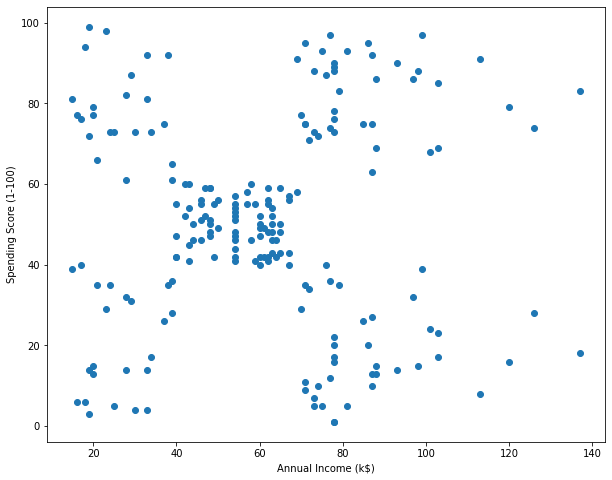

In [70]:
plt.figure(figsize=(10,8))
plt.scatter("Annual Income (k$)","Spending Score (1-100)",data=data)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [71]:
x=data.iloc[:,3:5]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [72]:
x=np.array(x)

In [73]:
k=5
def init_centroids(x,k):
  m,n=x.shape
  centroids=np.zeros((k,n))
  index=np.random.randint(0,m,k)
  for i in range(k):
    centroids[i,:]=x[index[i],:]
  return centroids

In [74]:
initial_centroids=init_centroids(x,k)

In [75]:
initial_centroids

array([[ 43.,  45.],
       [113.,   8.],
       [ 44.,  46.],
       [ 54.,  52.],
       [ 54.,  53.]])

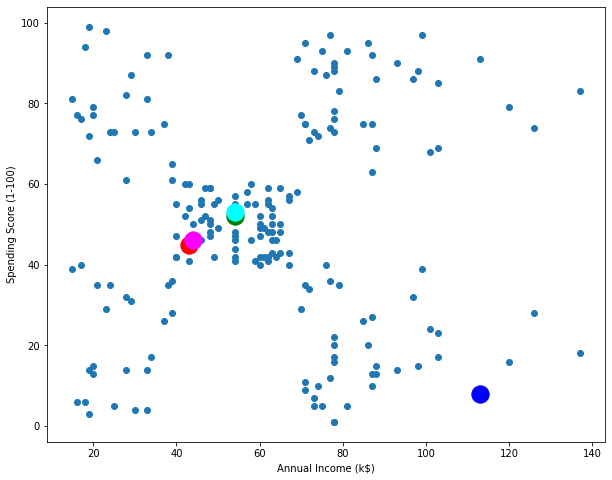

In [76]:
color=["red","blue","magenta","green","cyan"]
K=5
fig,ax=plt.subplots(figsize=(10,8))
plt.scatter("Annual Income (k$)","Spending Score (1-100)",data=data)
for z in range(K):
  ax.scatter(initial_centroids[z][0],initial_centroids[z][1],marker="o",s=300,c=color[z])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [77]:
def find_closest_centroids(x, centroids):
    m = x.shape[0]
    k = centroids.shape[0] 
    nearby_centroid = np.zeros(m) 
    
    for i in range(m):
        min_dist = float('inf')

        
        for j in range(k):
            
            dist = np.sum((x[i,:] - centroids[j,:]) ** 2) 
            if dist < min_dist:
                min_dist = dist 
                nearby_centroid[i] = j 
    
    return nearby_centroid 

In [78]:
nearby_centroid = find_closest_centroids(x, initial_centroids)
print(nearby_centroid)

[0. 2. 0. 2. 0. 2. 0. 4. 0. 2. 0. 4. 0. 2. 0. 2. 0. 0. 0. 4. 0. 2. 0. 2.
 0. 4. 0. 0. 0. 4. 0. 2. 0. 4. 0. 4. 0. 4. 0. 4. 0. 4. 0. 2. 0. 4. 2. 0.
 0. 0. 2. 4. 2. 4. 0. 0. 2. 2. 2. 2. 4. 4. 2. 4. 3. 4. 2. 2. 4. 2. 4. 2.
 3. 4. 3. 4. 4. 3. 3. 3. 3. 4. 3. 3. 4. 3. 4. 4. 4. 3. 4. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 4. 4. 4. 3. 3. 3. 3. 3. 3. 4. 3. 3. 3. 3. 3. 4. 3. 4.
 4. 3. 4. 4. 3. 4. 3. 4. 1. 4. 1. 4. 3. 4. 1. 4. 1. 4. 1. 4. 1. 4. 3. 4.
 1. 4. 3. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 3. 4. 1. 4. 1. 4. 1. 4.
 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4. 1. 4.
 1. 4. 1. 4. 1. 1. 1. 1.]


In [79]:
def compute_centroids(X, nearby_centroid, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
        
    for i in range(k):
        indices = np.where(nearby_centroid == i)
        sum_of_cluster = np.sum(X[indices,:], axis=1)
      
        centroids[i,:] = (sum_of_cluster / len(indices[0]))
    
    return centroids

In [80]:
New_centroids = compute_centroids(x, nearby_centroid, k)
New_centroids

array([[28.66666667, 27.5       ],
       [91.88235294, 19.29411765],
       [35.        , 60.68181818],
       [61.75609756, 44.3902439 ],
       [66.10958904, 74.02739726]])

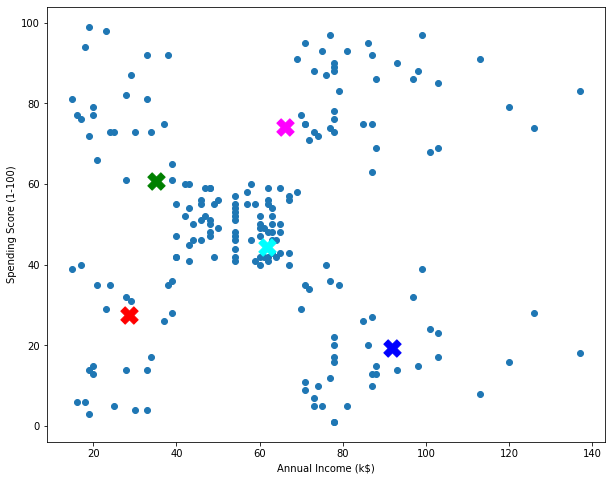

In [81]:
color=['red','blue','green','cyan','magenta']
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter('Annual Income (k$)', 'Spending Score (1-100)', data=data)
for z in range(K):
  ax.scatter(New_centroids[z][0], New_centroids[z][1], marker='X',s=300, c=color[z] )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [82]:
def k_means(X, initial_centroids, max_iters):
      
    centroids = initial_centroids
    
    for i in range(max_iters):
        nearby_centroid = find_closest_centroids(X, centroids) 
        centroids = compute_centroids(X, nearby_centroid, k)
    
    return nearby_centroid, centroids

In [83]:
nearby_centroid, centroids = k_means(x, initial_centroids, 15)

In [84]:
centroids

array([[26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513]])

In [85]:
nearby_centroid

array([0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0.,
       2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2.,
       0., 2., 0., 2., 0., 2., 0., 2., 0., 3., 0., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 4., 1., 4., 3., 4., 1., 4., 1., 4., 3., 4., 1., 4.,
       1., 4., 1., 4., 1., 4., 3., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1.,
       4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4.,
       1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1.,
       4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4., 1., 4.])

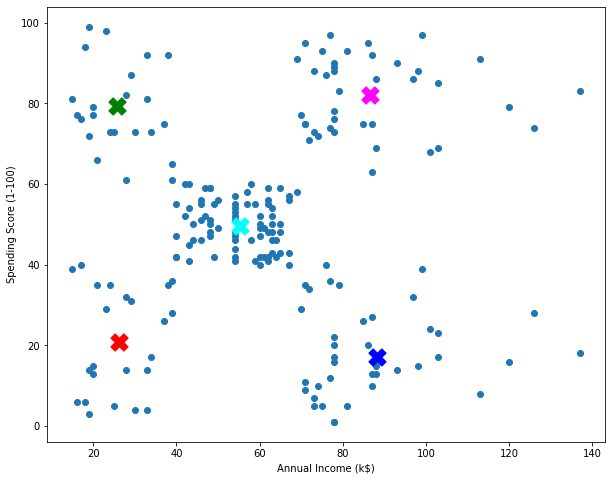

In [86]:
color=['red','blue','green','cyan','magenta']
#K = 5
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter('Annual Income (k$)', 'Spending Score (1-100)', data=data)
for z in range(k):
  ax.scatter(centroids[z][0], centroids[z][1], marker='X',s=300, c=color[z] )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [87]:
x[np.where(nearby_centroid == 0)]

array([[15, 39],
       [16,  6],
       [17, 40],
       [18,  6],
       [19,  3],
       [19, 14],
       [20, 15],
       [20, 13],
       [21, 35],
       [23, 29],
       [24, 35],
       [25,  5],
       [28, 14],
       [28, 32],
       [29, 31],
       [30,  4],
       [33,  4],
       [33, 14],
       [34, 17],
       [37, 26],
       [38, 35],
       [39, 36],
       [39, 28]])

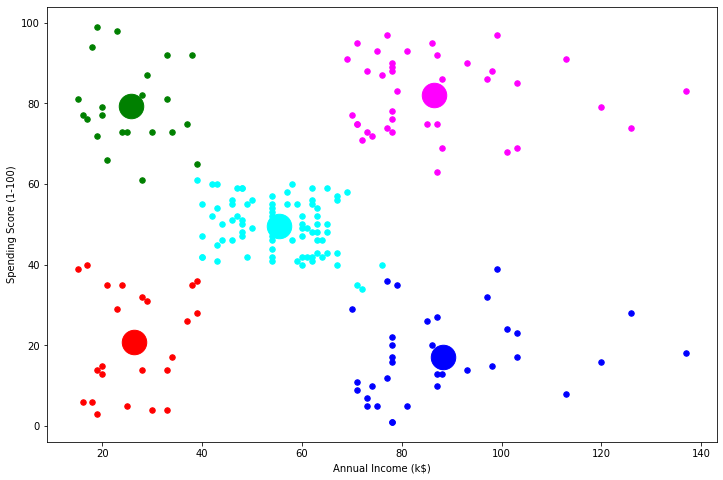

In [89]:
cluster1 = x[np.where(nearby_centroid == 0)] 
cluster2 = x[np.where(nearby_centroid == 1)] 
cluster3 = x[np.where(nearby_centroid == 2)] 
cluster4 = x[np.where(nearby_centroid == 3)] 
cluster5 = x[np.where(nearby_centroid == 4)]

color=['red','blue','green','cyan','magenta']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='red', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='blue', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='green', label='Cluster 3')
ax.scatter(cluster4[:,0], cluster4[:,1], s=30, color='cyan', label='Cluster 4')
ax.scatter(cluster5[:,0], cluster5[:,1], s=30, color='magenta', label='Cluster 5')

for z in range(k):
  ax.scatter(centroids[z][0], centroids[z][1], marker='o',s=600, c=color[z] )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()